IMPORTAZIONE LIBRERIE

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import array 
import scipy.signal as signal
#Processing libraries
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import seaborn as sns
from scipy.stats import zscore
from sklearn.multiclass import OneVsRestClassifier

# Model libraries
from sklearn.linear_model import LogisticRegression, SGDClassifier, Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

# Testing libraries
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, learning_curve
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, classification_report, roc_curve, auc

# remove warnings
import warnings
warnings.filterwarnings('ignore')

CAMBIO PATH PER ANALISI RISPETTO AL LOG DI VOLO CONSIDERAT

In [2]:
path_file = os.path.abspath(os.getcwd())
print(path_file)
os.chdir(path_file)

c:\Users\chiar\OneDrive\Desktop\MantenzionePreventiva\ProgettoManutenzionePreventiva


ARRAY CHE CONTERRA' I DATAFRAME DI CIASCUN VOLO (PER UN TOTALE DI 18)

In [3]:
data_path = os.path.join(path_file,'*.csv') #lista di tutti gli elementi di estensione csv nella cartella path
csv_list = glob.glob(data_path) #converte data path in un output Unix-like (ls) (*.csv -> lista di elementi con estensione csv)
dataframe_collection = []
df_1 = pd.DataFrame()

# ciclo per scorrere tutti i csv
for csv_file in csv_list: # ciclo che scorre i csv nella cartella path
    df = pd.read_csv(csv_file) 
    #df = df.to_numpy()
    #df = df.to_records(index=False)
    #dataframe_collection.append(df)
    df_1 = df_1.append(df,ignore_index=True)
    #print(df)

# ciclo per scorrere tutti i csv
for csv_file in csv_list: # ciclo che scorre i csv nella cartella path
    df = pd.read_csv(csv_file) 
    #df = df.to_numpy()
    df = df.to_records(index=False)
    dataframe_collection.append(df)

#prova = pd.DataFrame(dataframe_collection)


In [4]:
print(df_1)

      tempo  <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  \
0       0.0 -0.032100   0.017081   -0.399284   0.134398         78.0   
1       1.0 -0.032346   0.017054   -0.400010   0.134356        102.0   
2       2.0 -0.032590   0.017026   -0.400594   0.134314         98.0   
3       3.0 -0.032832   0.016999   -0.401113   0.134271        102.0   
4       4.0 -0.033265   0.017017   -0.412325   0.134447        102.0   
...     ...       ...        ...         ...        ...          ...   
1344   62.0 -0.048472   0.006254   -0.082119   0.092673          0.0   
1345   63.0 -0.048289   0.006253   -0.081993   0.092571          0.0   
1346   64.0 -0.048212   0.006240   -0.075446   0.092463          0.0   
1347   65.0 -0.048179   0.006225   -0.068067   0.092367          0.0   
1348   66.0 -0.048194   0.006211   -0.061448   0.092295          0.0   

      freq2(GyrX)  amp1(GyrX)  amp2(GyrX)  <>(GyrY)  ...  amp2(RPM(ESC_5))  \
0            96.0    3.596543    3.414090 -0.014483  ... 

In [5]:
df_1 = df_1.sample(frac=1).reset_index(drop=True)
print(df_1)

      tempo  <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  \
0      11.0  0.008713   0.007579   -0.462662   0.087371         73.0   
1       0.0 -0.011828   0.017444    0.197152   0.132418         88.0   
2       1.0 -0.062530   0.012927    0.160190   0.129615          0.0   
3      41.0 -0.133655   0.032346   -0.709440   0.223891          0.0   
4      13.0 -0.112881   0.040022   -0.460907   0.229466         55.0   
...     ...       ...        ...         ...        ...          ...   
1344   12.0 -0.014989   0.006156   -0.339726   0.079775         94.0   
1345   51.0 -0.055357   0.026612   -0.935913   0.172077          0.0   
1346   30.0 -0.040854   0.016862   -0.505814   0.135968        110.0   
1347   33.0 -0.029504   0.020084   -0.139736   0.144577        109.0   
1348   17.0 -0.036746   0.016914   -0.447451   0.134976        104.0   

      freq2(GyrX)  amp1(GyrX)  amp2(GyrX)  <>(GyrY)  ...  amp2(RPM(ESC_5))  \
0            92.0    2.154838    1.737811  0.020216  ... 

In [6]:
df_1 = df_1.drop(['tempo'], axis=1)
print(df_1)

      <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
0     0.008713   0.007579   -0.462662   0.087371         73.0         92.0   
1    -0.011828   0.017444    0.197152   0.132418         88.0         66.0   
2    -0.062530   0.012927    0.160190   0.129615          0.0         65.0   
3    -0.133655   0.032346   -0.709440   0.223891          0.0        108.0   
4    -0.112881   0.040022   -0.460907   0.229466         55.0         78.0   
...        ...        ...         ...        ...          ...          ...   
1344 -0.014989   0.006156   -0.339726   0.079775         94.0         70.0   
1345 -0.055357   0.026612   -0.935913   0.172077          0.0         72.0   
1346 -0.040854   0.016862   -0.505814   0.135968        110.0         86.0   
1347 -0.029504   0.020084   -0.139736   0.144577        109.0         84.0   
1348 -0.036746   0.016914   -0.447451   0.134976        104.0         72.0   

      amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...  amp2(RP

In [7]:
scale = MinMaxScaler()
df_1[df_1.columns.difference(['Guasto'])] = scale.fit_transform(df_1[df_1.columns.difference(['Guasto'])])
print(df_1)

      <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
0     0.865903   0.031171    0.186175   0.057690     0.503448     0.625850   
1     0.747523   0.210201    0.299044   0.322063     0.606897     0.448980   
2     0.455332   0.128221    0.292721   0.305612     0.000000     0.442177   
3     0.045444   0.480620    0.143961   0.858899     0.000000     0.734694   
4     0.165164   0.619920    0.186475   0.891615     0.379310     0.530612   
...        ...        ...         ...        ...          ...          ...   
1344  0.729304   0.005360    0.207205   0.013111     0.648276     0.476190   
1345  0.496668   0.376570    0.105220   0.554814     0.000000     0.489796   
1346  0.580250   0.199642    0.178793   0.342896     0.758621     0.585034   
1347  0.645658   0.258108    0.241415   0.393422     0.751724     0.571429   
1348  0.603925   0.200583    0.188777   0.337077     0.717241     0.489796   

      amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...  amp2(RP

In [8]:
correlated_features = set()
correlation = df_1[df_1.columns[1:]].corr()['Guasto'][:].abs()
correlation = correlation.loc[lambda x : ((x > 0.7) & (x < 1))]
index = correlation.index
print(index)
df_1 = df_1.drop([col for col in df_1.columns if col in index],axis=1)
print(df_1.columns)

Index(['<>(RPM(ESC_5))', 'RMS(RPM(ESC_5))'], dtype='object')
Index(['<>(GyrX)', 'var(GyrX)', 'kurt(GyrX)', 'RMS(GyrX)', 'freq1(GyrX)',
       'freq2(GyrX)', 'amp1(GyrX)', 'amp2(GyrX)', '<>(GyrY)', 'var(GyrY)',
       ...
       'amp2(RPM(ESC_5))', '<>(Curr(ESC_5))', 'var(Curr(ESC_5))',
       'kurt(Curr(ESC_5))', 'RMS(Curr(ESC_5))', 'freq1(Curr(ESC_5))',
       'freq2(Curr(ESC_5))', 'amp1(Curr(ESC_5))', 'amp2(Curr(ESC_5))',
       'Guasto'],
      dtype='object', length=167)


In [9]:
index_list = [340]
df_test = df_1.query('index in @index_list')
#df_test = pd.DataFrame(df_test)
print(df_test)

     <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
340  0.557891   0.061054     0.38007    0.16612          0.0     0.510204   

     amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...  amp2(RPM(ESC_5))  \
340    0.230638    0.269948  0.889472   0.047747  ...          0.623852   

     <>(Curr(ESC_5))  var(Curr(ESC_5))  kurt(Curr(ESC_5))  RMS(Curr(ESC_5))  \
340         0.243394          0.427361            0.09373          0.261883   

     freq1(Curr(ESC_5))  freq2(Curr(ESC_5))  amp1(Curr(ESC_5))  \
340            0.882184             0.87069           0.413459   

     amp2(Curr(ESC_5))  Guasto  
340           0.149631       0  

[1 rows x 167 columns]


In [10]:
# Drop values to avoid multicolinearity
df_test = df_test.drop(['Guasto'], axis=1)

In [11]:
#df_1 = df_1.drop([df_1.index[1330], df_1.index[1331]])
df_1 = df_1.drop([df_1.index[340]])
print(df_1)

      <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
0     0.865903   0.031171    0.186175   0.057690     0.503448     0.625850   
1     0.747523   0.210201    0.299044   0.322063     0.606897     0.448980   
2     0.455332   0.128221    0.292721   0.305612     0.000000     0.442177   
3     0.045444   0.480620    0.143961   0.858899     0.000000     0.734694   
4     0.165164   0.619920    0.186475   0.891615     0.379310     0.530612   
...        ...        ...         ...        ...          ...          ...   
1344  0.729304   0.005360    0.207205   0.013111     0.648276     0.476190   
1345  0.496668   0.376570    0.105220   0.554814     0.000000     0.489796   
1346  0.580250   0.199642    0.178793   0.342896     0.758621     0.585034   
1347  0.645658   0.258108    0.241415   0.393422     0.751724     0.571429   
1348  0.603925   0.200583    0.188777   0.337077     0.717241     0.489796   

      amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...  amp2(RP

### Bilanciamento del dataset

In [12]:
x = df_1.iloc[:,:-1]
y = df_1.iloc[:,-1:]

In [13]:
oversample = SMOTE()
x, y = oversample.fit_resample(x,y)
print(x)

      <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
0     0.865903   0.031171    0.186175   0.057690     0.503448     0.625850   
1     0.747523   0.210201    0.299044   0.322063     0.606897     0.448980   
2     0.455332   0.128221    0.292721   0.305612     0.000000     0.442177   
3     0.045444   0.480620    0.143961   0.858899     0.000000     0.734694   
4     0.165164   0.619920    0.186475   0.891615     0.379310     0.530612   
...        ...        ...         ...        ...          ...          ...   
1618  0.652918   0.030034    0.159461   0.079443     0.661915     0.500892   
1619  0.022572   0.650010    0.001061   0.988600     0.480540     0.599610   
1620  0.850865   0.030141    0.189348   0.054508     0.000000     0.535200   
1621  0.634214   0.033899    0.142939   0.092388     0.729839     0.640845   
1622  0.007184   0.636823    0.005169   0.988835     0.582514     0.542734   

      amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...  amp1(RP

# Selezione feature più importanti

In [14]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_classif, f_regression
fvalue_Best = SelectKBest(score_func=f_regression, k=30)
fit = fvalue_Best.fit(x, y)
print(fit)
print(fvalue_Best.get_support())

SelectKBest(k=30, score_func=<function f_regression at 0x00000284A1D812D0>)
[False False False False  True False False False  True  True False  True
  True False  True False False  True False  True False False  True False
 False False False False  True False  True False  True False  True False
 False False False False False False False False False False False False
 False False False False False False False False False  True False False
 False False  True False False False False False False False False False
 False False False False  True  True  True False  True  True False  True
 False False False False False False False False  True  True False False
 False  True False False False False False False  True False False  True
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False

In [15]:
features_score = pd.DataFrame(fit.scores_)
features_score = zscore(features_score)
features = pd.DataFrame(x.columns)
feature_score = pd.concat([features,features_score],axis=1)
# Assigning column names
feature_score.columns = ["Input_Features","F_Score"]
print(feature_score.nlargest(60,columns="F_Score"))

        Input_Features   F_Score
34          kurt(AccY)  5.315640
28         freq1(AccX)  3.527916
12         freq1(GyrY)  3.230635
11           RMS(GyrY)  2.846607
93   freq2(RPM(ESC_1))  2.692176
92   freq1(RPM(ESC_1))  2.680295
9            var(GyrY)  2.678601
153   kurt(RPM(ESC_5))  2.588250
14          amp1(GyrY)  2.417965
159   var(Curr(ESC_5))  2.120253
104     <>(RPM(ESC_2))  1.976846
78    amp1(RPM(ESC_0))  1.762523
8             <>(GyrY)  1.752332
152    var(RPM(ESC_5))  1.697010
107    RMS(RPM(ESC_2))  1.691740
22          amp1(GyrZ)  1.454304
32            <>(AccY)  1.442875
62         amp1(Pitch)  1.278593
80     <>(Curr(ESC_0))  1.078595
17           var(GyrZ)  1.053404
76   freq1(RPM(ESC_0))  1.035915
30          amp1(AccX)  1.007171
4          freq1(GyrX)  0.980073
19           RMS(GyrZ)  0.977310
57          var(Pitch)  0.918202
77   freq2(RPM(ESC_0))  0.869058
83    RMS(Curr(ESC_0))  0.675498
156   amp1(RPM(ESC_5))  0.668583
97    var(Curr(ESC_1))  0.667296
81    var(

In [16]:
i=0
index_false=[]
for el in list(fvalue_Best.get_support()):
    if not el:
        index_false.append(i)
    i=i+1
print(index_false)

[0, 1, 2, 3, 5, 6, 7, 10, 13, 15, 16, 18, 20, 21, 23, 24, 25, 26, 27, 29, 31, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 58, 59, 60, 61, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 79, 82, 84, 85, 86, 87, 88, 89, 90, 91, 94, 95, 96, 98, 99, 100, 101, 102, 103, 105, 106, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 154, 155, 157, 158, 160, 161, 162, 163, 164, 165]


In [17]:
x=x.drop(x.columns[index_false],axis = 1)
print(x)

      freq1(GyrX)  <>(GyrY)  var(GyrY)  RMS(GyrY)  freq1(GyrY)  amp1(GyrY)  \
0        0.503448  0.607921   0.067280   0.137121     0.515152    0.021616   
1        0.606897  0.435369   0.028301   0.049806     0.000000    0.068748   
2        0.000000  0.657176   0.071004   0.154170     0.446970    0.026266   
3        0.000000  0.466701   0.052130   0.094262     0.810606    0.016089   
4        0.379310  0.837824   0.196083   0.368779     0.734848    0.142194   
...           ...       ...        ...        ...          ...         ...   
1618     0.661915  0.849664   0.249461   0.429253     0.865960    0.493519   
1619     0.480540  0.673970   0.159570   0.280863     0.682899    0.128472   
1620     0.000000  0.581358   0.070813   0.137867     0.767795    0.017977   
1621     0.729839  0.870124   0.246780   0.433016     0.889630    0.507579   
1622     0.582514  0.674596   0.154467   0.274602     0.638159    0.044321   

      var(GyrZ)  RMS(GyrZ)  amp1(GyrZ)  freq1(AccX)  ...  RMS(C

In [18]:
df_test=df_test.drop(df_test.columns[index_false],axis = 1)
print(df_test)

     freq1(GyrX)  <>(GyrY)  var(GyrY)  RMS(GyrY)  freq1(GyrY)  amp1(GyrY)  \
340          0.0  0.889472   0.047747   0.204901     0.810606    0.058361   

     var(GyrZ)  RMS(GyrZ)  amp1(GyrZ)  freq1(AccX)  ...  RMS(Curr(ESC_0))  \
340   0.049698   0.115768    0.676962     0.887417  ...          0.345115   

     freq1(RPM(ESC_1))  freq2(RPM(ESC_1))  var(Curr(ESC_1))  <>(RPM(ESC_2))  \
340           0.160584           0.183824          0.078575        0.412341   

     RMS(RPM(ESC_2))  var(RPM(ESC_5))  kurt(RPM(ESC_5))  amp1(RPM(ESC_5))  \
340         0.369853         0.641077          0.042531          0.950862   

     var(Curr(ESC_5))  
340          0.427361  

[1 rows x 30 columns]


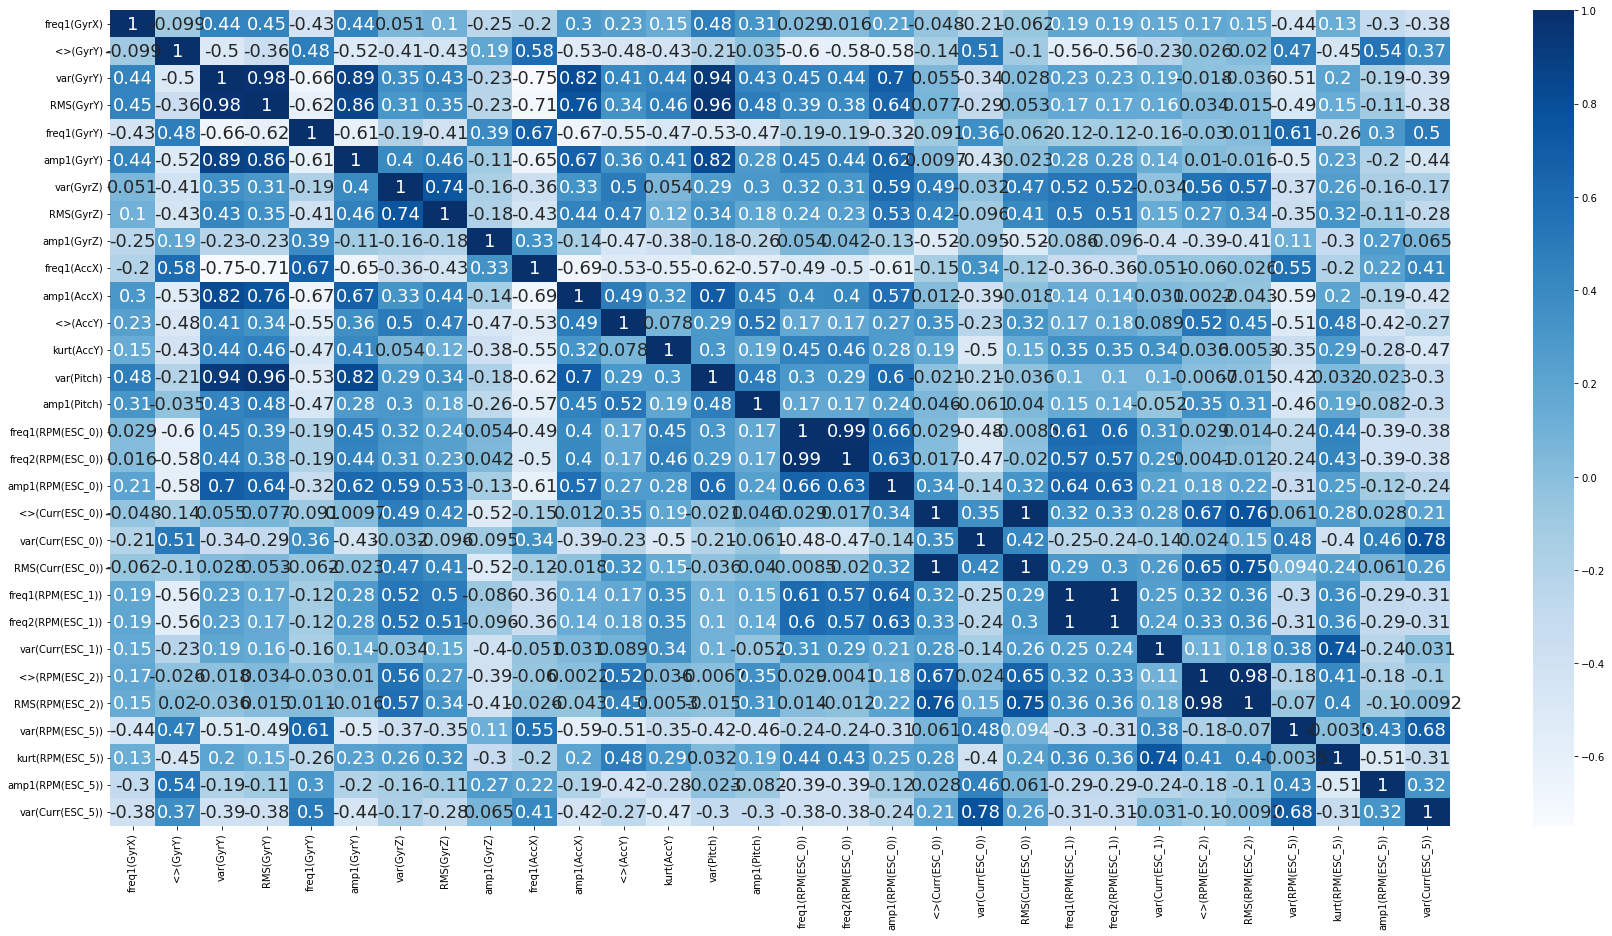

In [19]:
plt.figure(figsize=(30,15))
ax = sns.heatmap(x[x.columns].corr(),cmap="Blues",annot=True,annot_kws={"size": 18})

In [20]:
correlated_features = set()
correlation_matrix = x.corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if (correlation_matrix.iloc[i, j] > 0.8) | (correlation_matrix.iloc[i, j] < -0.5):
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

x = x.drop([col for col in x.columns if col in correlated_features],axis=1)
print(x)

      freq1(GyrX)  <>(GyrY)  var(GyrZ)  RMS(GyrZ)  amp1(GyrZ)  \
0        0.503448  0.607921   0.047583   0.423652    0.138105   
1        0.606897  0.435369   0.140942   0.684857    0.298249   
2        0.000000  0.657176   0.031157   0.138046    0.767616   
3        0.000000  0.466701   0.087700   0.425795    0.389490   
4        0.379310  0.837824   0.020578   0.181377    0.043205   
...           ...       ...        ...        ...         ...   
1618     0.661915  0.849664   0.087121   0.309640    0.724226   
1619     0.480540  0.673970   0.039366   0.350702    0.074740   
1620     0.000000  0.581358   0.046457   0.406215    0.128794   
1621     0.729839  0.870124   0.086321   0.296316    0.798047   
1622     0.582514  0.674596   0.039335   0.339116    0.202670   

      var(Curr(ESC_1))  <>(RPM(ESC_2))  kurt(RPM(ESC_5))  var(Curr(ESC_5))  
0             0.998251        0.328317          0.661472          0.652031  
1             0.367041        0.648777          0.502558         

In [21]:
df_test=df_test.drop([col for col in df_test.columns if col in correlated_features],axis=1)
print(df_test)

     freq1(GyrX)  <>(GyrY)  var(GyrZ)  RMS(GyrZ)  amp1(GyrZ)  \
340          0.0  0.889472   0.049698   0.115768    0.676962   

     var(Curr(ESC_1))  <>(RPM(ESC_2))  kurt(RPM(ESC_5))  var(Curr(ESC_5))  
340          0.078575        0.412341          0.042531          0.427361  


In [ ]:
plt.figure(figsize=(30,15))
ax = sns.heatmap(x[x.columns].corr(),cmap="Blues",annot=True,annot_kws={"size": 18})

### Separazione del dataset in training e test

In [22]:
# Random state
rs = 42

# Split the data to check which algorithms learn better (later on we can check )
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=rs)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# look at the shape of the data (many problems can arise from wrong shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1298, 9)
(325, 9)
(1298, 1)
(325, 1)


In [23]:
from sklearn.calibration import CalibratedClassifierCV

# List of classifiers:
classifiers = [
    LogisticRegression(random_state = rs),
    DecisionTreeClassifier(random_state=rs),
    RandomForestClassifier(n_estimators = 10, random_state=rs),
    GradientBoostingClassifier(random_state= rs),
    AdaBoostClassifier(n_estimators=10, random_state= rs),
    LinearDiscriminantAnalysis(),
    SVC(probability=True),
    MLPClassifier(random_state=rs), # Multi Layer Perceptron
    SGDClassifier(random_state=rs), # Stochastic Gradient Descent 
    Perceptron(random_state=rs)
]

# List of results that will occure:
clf_name = [] # names of the classifiers
model_results = pd.DataFrame.copy(y_test) #resulting of prediction from the models

kfold = StratifiedKFold(n_splits=5) #cross-validation
cv_results = [] # scores from cross validation
cv_acc = [] # mean accuracy from cross validation, need to maximize
cv_std = [] # standard deviation from cross validation, need to minimise

cnfm = [] #confusion matrix
clr = [] #classification report
roc_auc = [] #roc curve:
roc_tpr = []
roc_fpr = []

### Classificazione

In [24]:
# Training the algorithms and results
for clf in classifiers:
    name = clf.__class__.__name__
    clf_name.append(name)
    
    #fitting and predictions
    model = clf.fit(x_train, y_train.values.ravel())
    y_pred = model.predict(x_test)
    model_results[name] = y_pred
    
    #accuracy and log loss
    cv_results.append(cross_val_score(clf, x_train, y_train.values.ravel(), scoring = "accuracy",cv = kfold)) # qui invece abbiamo cross validation
    acc = round(accuracy_score(y_test.values.ravel(), y_pred), 2) # accuratezza semplice con training e test
    train_pred = clf.predict(x_test)
    print(f'Cross-Validation: {cross_val_score(clf, x_train, y_train.values.ravel(), scoring = "accuracy",cv = kfold)}') 
    
    print(f'Accuracy: {acc} \t ---> {name} ')

    guasto_pred = pd.Series(model.predict(df_test), name='Guasto_test')
    conteggio = guasto_pred.value_counts()
    print(f'Test: {conteggio}')

    print("----------------------------------------------------")
    
    
    #confusion matrix, clasification report, roc curve
    cnfm.append(confusion_matrix(y_test.values.ravel(), y_pred))
    clr.append(classification_report(y_test.values.ravel(), y_pred))
    fpr, tpr, thresholds = roc_curve(y_pred, y_test.values.ravel(), pos_label=1)
    roc_auc.append(auc(fpr, tpr))
    roc_tpr.append(tpr)
    roc_fpr.append(fpr)
    
    i += 1

for i in cv_results:
    cv_acc.append(i.mean())
    cv_std.append(i.std())


Cross-Validation: [1.         1.         0.99230769 0.98841699 0.98841699]
Accuracy: 0.99 	 ---> LogisticRegression 
Test: 0    1
Name: Guasto_test, dtype: int64
----------------------------------------------------
Cross-Validation: [0.99230769 1.         1.         1.         1.        ]
Accuracy: 1.0 	 ---> DecisionTreeClassifier 
Test: 0    1
Name: Guasto_test, dtype: int64
----------------------------------------------------
Cross-Validation: [1. 1. 1. 1. 1.]
Accuracy: 1.0 	 ---> RandomForestClassifier 
Test: 0    1
Name: Guasto_test, dtype: int64
----------------------------------------------------
Cross-Validation: [1.         1.         0.99615385 1.         1.        ]
Accuracy: 1.0 	 ---> GradientBoostingClassifier 
Test: 0    1
Name: Guasto_test, dtype: int64
----------------------------------------------------
Cross-Validation: [1. 1. 1. 1. 1.]
Accuracy: 1.0 	 ---> AdaBoostClassifier 
Test: 0    1
Name: Guasto_test, dtype: int64
----------------------------------------------

### Matrici di confusione

In [ ]:
import seaborn as sns
# Confusion matrixes (not-normalized confusion matrix)
plt.figure(figsize=(20,15))
sns.set(font_scale=1.4)
for i in range(len(classifiers)):
    plt.subplot(3,3,i+1) #adjust this acourding to the number of algorithms
    sns.heatmap(cnfm[i], annot=True, fmt="d",cmap="Reds")
    plt.subplots_adjust(hspace = 0.5)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(clf_name[i])

In [ ]:
#Classification reports
for i in range(len(classifiers)):
    print (f"{clf_name[i]} Classification Report:" )
    print (clr[i])